## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 scikit-learn==1.3.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

In [3]:
# import libraries to ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the dataset

In [4]:
# uncomment and run the following lines for Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Read the data from the csv file
#loan_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Personal Loan Campaign/Loan_Modelling.csv')
loan_data = pd.read_csv('Loan_Modelling.csv')

# Copy the loan data for further processing to avoid any changes to the original data
data = loan_data.copy()

## Data Overview

### Viewing the first five and last five records of the data

In [6]:
# Code to look at the first 5 rows
data.head(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [7]:
# Code to look at the last 5 rows
data.tail(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Checking the shape of the data

In [8]:
data.shape

(5000, 14)

* There are 5000 rows and 14 columns

### Checking the attribute types

In [9]:
# Check the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB




*   There are 6 numeric and 8 categorical columns in the data.
* **ID** column though interpreted as numerical, it's a categorical variable representing the unique value of the record.
* **ZIPCode** column though interpreted as numerical, it's a categorical variable representing unique identifier for a location.
* **Education** column though interpreted as numerical, it's a categorical variable encoded by default (1: Undergrad; 2: Graduate;3: Advanced/Professional).
* **Personal_Loan**, **Securities_Account**, **CD_Account**, **Online**, **CreditCard** columns, though interpreted as numerical, all of them are similar categorical variables encoded by default (Yes - 1 and No - 0).


### Checking the statistical summary

In [10]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* Average age of the customers is 45 years, and the range is between 23 and 67 years.
* Avergae experience of the customers is 20 years. The minimum experience is -3 indicating possible data issues for this column.
* Average income of the customers is ~73k.
* The zipcodes range from 90005 to 96651, which are CA zip codes.
* Average monthly credit card spending is ~1.9k, and the spending range is between 0 and $10k.
* All customers have a minimum of an undergraduate education.
* More than 50% of the customers do not have a mortgage.
* More than 75% of the customers didn't accept the personal loan from the last campaign.
* More than 75% of the customers do not have a securities account, or CD account.
* More than 50% of the customers use internet banking facilities.
* More than 50% of the customers do not use a credit card from other banks.

### Checking for missing values

In [11]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

*   There are no missing values in the dataset.

### Checking for duplicate values

In [12]:
data.duplicated().sum()

0

* There are no duplicate values in the data.

### Additional data analysis to answer the questions

In [13]:
# Find the number of customer with average spending on credit cards per month greater than "0", and summarize by customer groups using a credit card with other banks or not.
data[data['CCAvg'] > 0].groupby('CreditCard')['CCAvg'].count()

CreditCard
0    3452
1    1442
Name: CCAvg, dtype: int64

* There are 4894 customers who have a credit card either with All life Bank or/and any other bank.
* There are 3452 customers who use the credit card  only with All life Bank.

## Data Preprocessing

#### Dropping Columns

* As ID column is an unique identifier for each of the rows, dropping it from the data set for further analysis.

In [14]:
# Dropping 'ID' column from the data set for further analysis.
data.drop('ID', axis=1, inplace=True)

In [15]:
# verify the first five rows
data.head(5)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

#### Data Anomalies

* There are records with negative values for professional experience ("Experience" column).

In [16]:
# Find the number of records with negative value for experience
data[data['Experience'] < 0]['Experience'].count()

52

* There are 52 records with negative value for Experience. ~1% of the dataset is impacted.

In [18]:
# Negative "Experience" could be data entry error, replacing them with the corresponding positive value by multiplying those data with -1
data['Experience'] = data['Experience'].apply(lambda x: x * -1 if x < 0 else x)

#### Feature Engineering

* Zip codes are location identifiers and need to be treated as a categorical variable.

In [19]:
print('The Zip codes range from',data['ZIPCode'].min(), 'to', data['ZIPCode'].max())
print('There are', data['ZIPCode'].nunique(), 'unique zip codes')

The Zip codes range from 90005 to 96651
There are 467 unique zip codes


* There are 467 unique zip codes, and all these are for different cities in CA.

In [20]:
# Create a new categorical column 'AreaCode' with the first 3 digits of the zip code, which represents the area code.
# This will help grouping the customer data into a less number of categories logically.
data['AreaCode'] = data['ZIPCode'].astype(str).apply(lambda x: x[0:3])

# Keep the 'AreaCode' column as numeical similar to 'ZIPCode'
data['AreaCode'] = data['AreaCode'].astype(int)

In [21]:
print('The Area codes range from',data['AreaCode'].min(), 'to', data['AreaCode'].max())
print('There are', data['AreaCode'].nunique(), 'unique Area codes')

The Area codes range from 900 to 966
There are 57 unique Area codes


* Almost all the area codes in CA are covered in this dataset.
* 467 Categorical values are now reduced to 57 for further analysis.

In [22]:
# Dropping 'ZIPCode' column from the data set, and 'AreaCode' will be used for further analysis.
data.drop('ZIPCode', axis=1, inplace=True)

#### Outliers Treatment

In [23]:
# Outlier detection for all numerical columns
iqr_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# find outliers
# Calculate Q1, Q3, and IQR
Q1 = data[iqr_cols].quantile(0.25)
Q3 = data[iqr_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for i, col in enumerate(iqr_cols):
  # Identify outliers
  outliers = data[(data[col] < lower_bound.loc[col]) | (data[col] > upper_bound.loc[col])]
  outlierCount = outliers[col].count()
  if outlierCount > 0:
    print(col, 'has', outlierCount, 'outliers')
    if(outliers[col].min()>upper_bound[col]):
      print("\tAll Outliers are in the upper bound")
      print("\tUpper Bound is",upper_bound[col])
      print("\tThe Outliers range between",outliers[col].min(),"and",outliers[col].max())
    elif(outliers[col].max()<lower_bound[col]):
      print("\tAll Outliers are in the lower bound")
      print("\tLower Bound is",lower_bound[col])
      print("\tThe Outliers range between",outliers[col].min(),"and",outliers[col].max())
    else:
      print("\tOutliers in both lower and upper bound")
      print("\tUpper Bound is",upper_bound[col])
      print("\tLower Bound is",lower_bound[col])
      print("\tThe Outliers range between",outliers[col].min(),"and",outliers[col].max())
  else:
    print(col, 'has no outliers')


Age has no outliers
Experience has no outliers
Income has 96 outliers
	All Outliers are in the upper bound
	Upper Bound is 186.5
	The Outliers range between 188 and 224
Family has no outliers
CCAvg has 324 outliers
	All Outliers are in the upper bound
	Upper Bound is 5.2
	The Outliers range between 5.3 and 10.0
Mortgage has 291 outliers
	All Outliers are in the upper bound
	Upper Bound is 252.5
	The Outliers range between 253 and 635


**Outliers**
* Income Range (188K-224K): These values are possible for high-earning customers in affluent regions like California.
* Credit Card Monthly Spending (5.3K-10K): The spending range aligns with a subset of high-spending customers, likely reflecting their lifestyle or financial habits.
* Mortgage Range (253K-635K): These values are reasonable for homes in affluent neighborhoods in California, given the high property costs in the region.
* These outliers are contextually valid and represent distinct customer segments rather than anomalies. Hence the outliers need not be treated.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

#### Age, Experience, Income, Family,CCAvg and Mortgage

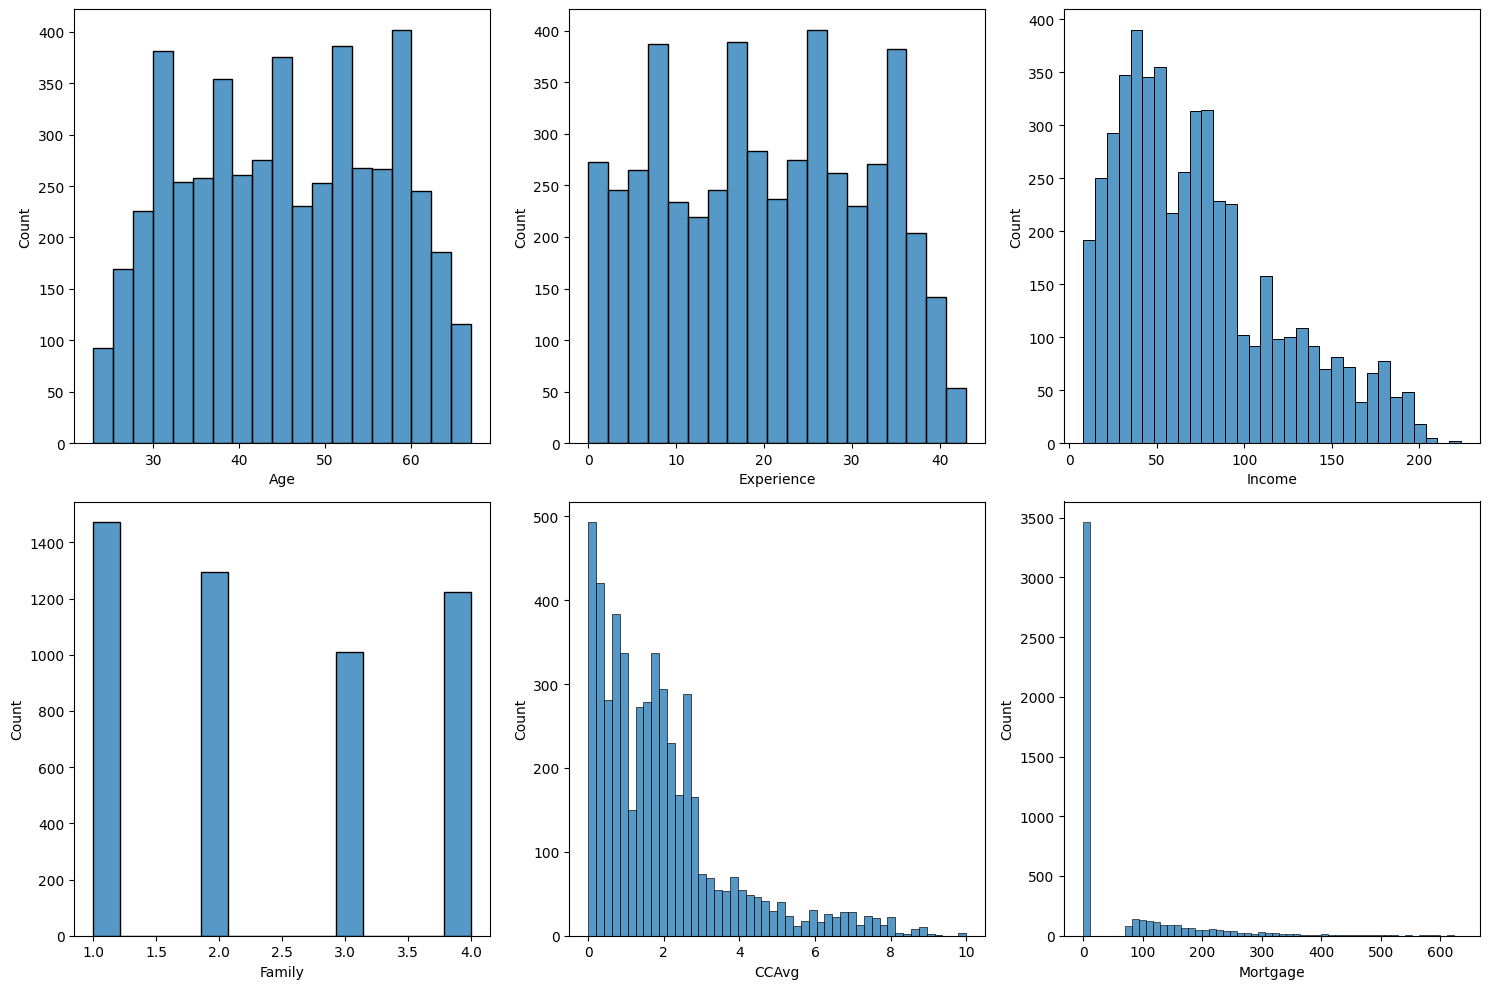

In [24]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age', 'Experience', 'Income','Family','CCAvg','Mortgage']

num_rows = int(np.ceil(len(num_features) / 3))
num_cols = 3

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

* **Age** and **Experience** distribution is uniform.
* **Income**, **CCAvg**, **Mortgage** distribution is right skewed

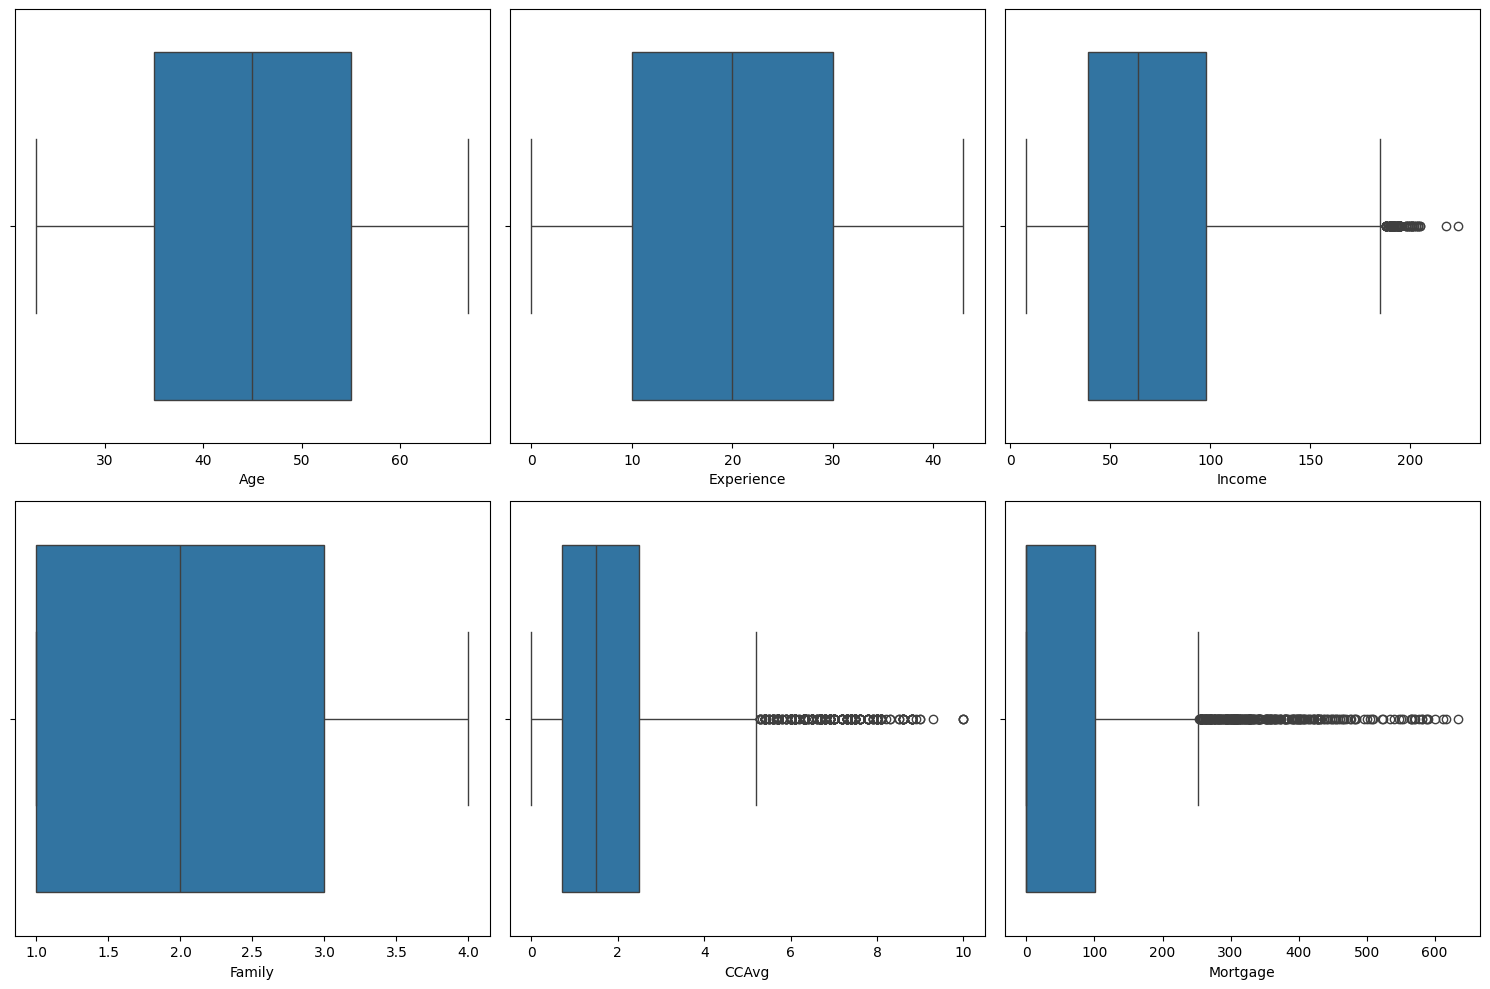

In [25]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();    # to add spacing between plots

* There are outliers in **Income**, **CCAvg**, and **Mortgage** data.

#### Education

Education
1    41.92
3    30.02
2    28.06
Name: proportion, dtype: float64 



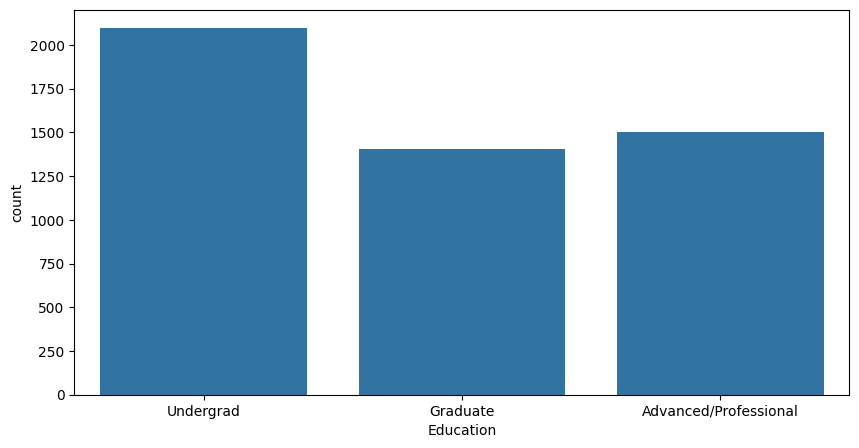

In [26]:
# Distribution of customers by Education

#print(data['Education'].value_counts(), '\n')
print(100*data['Education'].value_counts(normalize=True), '\n')

# Set x-axis tick locations and labels - 1: Undergrad; 2: Graduate;3: Advanced/Professional
xticks_education_value = [0, 1, 2]
xticks_education_label = ['Undergrad', 'Graduate','Advanced/Professional']

# defining the figure size
plt.figure(figsize=(10, 5))
plt.xticks(xticks_education_value, xticks_education_label)

#plt.xticks(rotation=45, ha='right')

# plotting the count plot for Education
sns.countplot(data=data, x='Education');

* ~ 42% of the customers are Under grads.

#### ZIPCode

AreaCode
900    7.50
921    5.58
950    5.34
945    5.28
941    5.14
943    5.14
947    5.02
920    4.96
940    4.84
913    4.44
926    3.64
956    3.24
902    3.22
917    3.00
958    2.82
931    2.68
939    2.04
951    1.92
946    1.78
928    1.62
949    1.50
911    1.42
927    1.24
923    1.20
930    1.16
925    0.98
907    0.90
934    0.86
919    0.82
957    0.80
906    0.76
935    0.72
904    0.70
955    0.64
916    0.58
960    0.58
910    0.58
905    0.56
953    0.52
959    0.38
908    0.38
954    0.38
933    0.36
937    0.36
948    0.34
924    0.34
944    0.26
952    0.26
914    0.26
922    0.20
936    0.16
912    0.14
942    0.14
966    0.12
961    0.10
918    0.06
903    0.04
Name: proportion, dtype: float64 



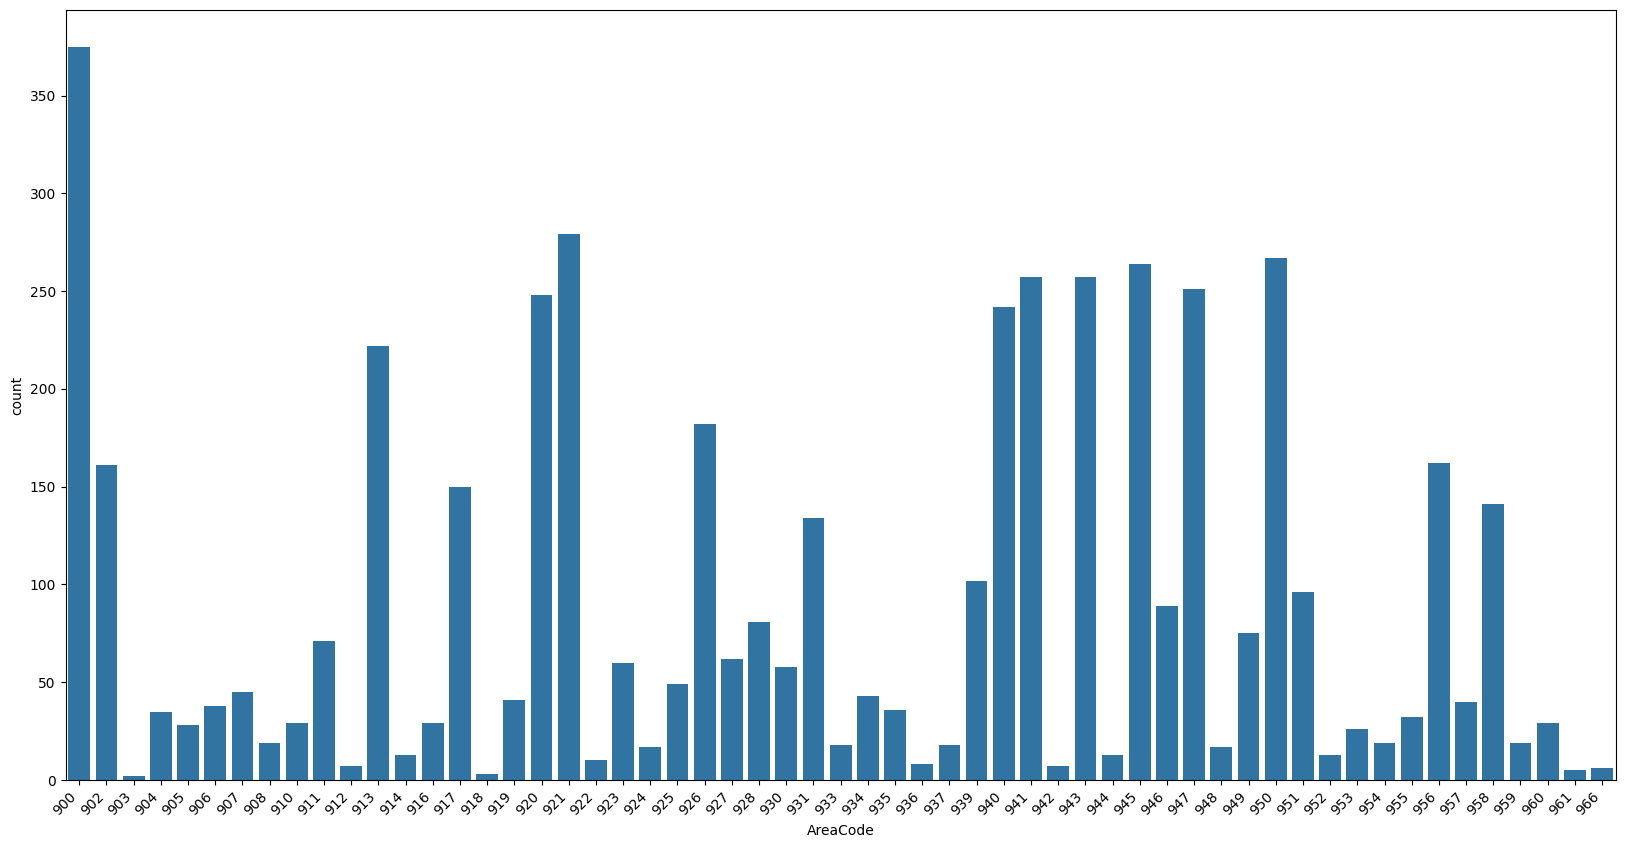

In [27]:
# Distribution of Customers by Area code (first three digits of the zip code)

#print(data['AreaCode'].value_counts(), '\n')
print(100*data['AreaCode'].value_counts(normalize=True), '\n')

# defining the figure size
plt.figure(figsize=(20, 10))

plt.xticks(rotation=45, ha='right')

# plotting the count plot for AreaCode
sns.countplot(data=data, x='AreaCode');

* There are 6 area codes where 5% or more customers are distributed. They are 900 (7.5%), 921 (5.58%), 950 (5.34%), 945 (5.28%), 941 (5.14%), 943 (5.14%) and 947 (5.02%).
* 39% of the customers are distributed in these 6 area codes.


#### Personal_Loan, Securities_Account, CD_Account, Online, CreditCard

Personal_Loan
0    4520
1     480
Name: count, dtype: int64 

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Securities_Account
0    4478
1     522
Name: count, dtype: int64 

Securities_Account
0    89.56
1    10.44
Name: proportion, dtype: float64 

CD_Account
0    4698
1     302
Name: count, dtype: int64 

CD_Account
0    93.96
1     6.04
Name: proportion, dtype: float64 

Online
1    2984
0    2016
Name: count, dtype: int64 

Online
1    59.68
0    40.32
Name: proportion, dtype: float64 

CreditCard
0    3530
1    1470
Name: count, dtype: int64 

CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64 



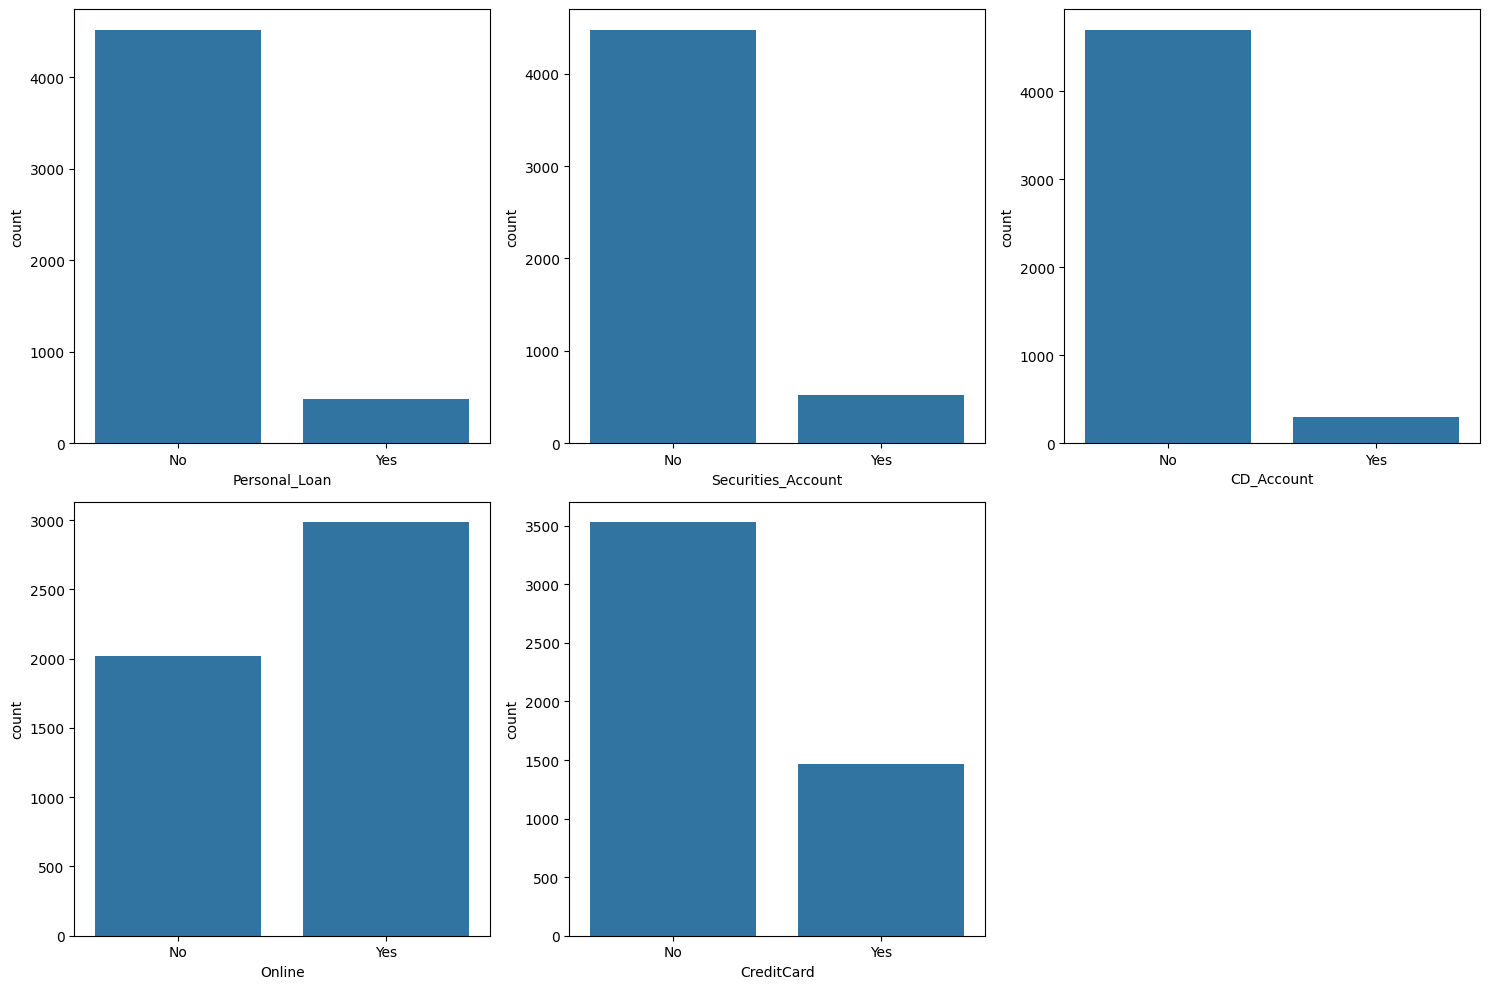

In [28]:
# defining the list of customer columns to plot
customer_boolean_features = ['Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

dfcustomer = data.copy()

# defining the figure size
plt.figure(figsize=(15, 10))

num_rows = int(np.ceil(len(customer_boolean_features) / 3))
num_cols = 3

xticks_boolean_value = [0, 1]
xticks_boolean_label = ['No', 'Yes']

# plotting the histogram for each account feature
for i, feature in enumerate(customer_boolean_features):
  # checking the distribution of the accounts
    print(dfcustomer[feature].value_counts(), '\n')
    print(100*dfcustomer[feature].value_counts(normalize=True), '\n')

    plt.subplot(num_rows, num_cols, i+1)    # assign a subplot in the main plot
    # Set x-axis tick locations and labels
    plt.xticks(xticks_boolean_value, xticks_boolean_label)
    sns.countplot(data=dfcustomer, x=feature)    # plot the count plot


plt.tight_layout();   # to add spacing between plots

* 9.6% of the customers have a personal loan.
* 10.44% of the customers have a Securities Account.
* 6.04% of the customers have a CD Account.
* 59.68% of the customers use internet banking facilities.
* 29.4% of the customers have a credit card issued by any other Bank (excluding All life Bank).

### Bivariate Analysis

#### Correlation

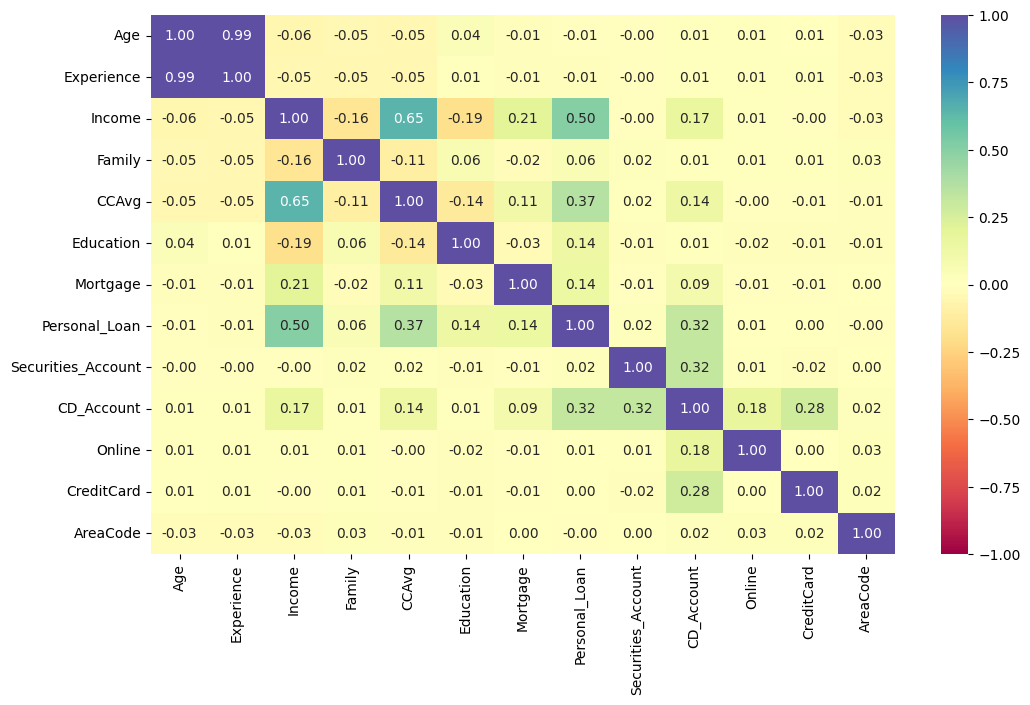

In [29]:
# defining the size of the plot
plt.figure(figsize=(12, 7))

# plotting the heatmap for correlation
sns.heatmap(
   data.corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

* **Age** and **Experience** have a very strong positive correlation. As the age increases the experience also increases.
* **Income** and **CCAvg** have a strong positive correlation.
* The correlation between **Income** and **Mortgage** is positive but not as strong as that between **Income** and **CCAvg**.
* **Personal_Loan** and **Income** have a moderate positive correlation.
* The correlation between **Personal_Loan** and **CCAvg**  & **Personal_Loan** and **CD_Account** are positive but not as strong as that between **Personal_Loan** and **Income**.
* **Personal_Loan** and **Education**  & **Personal_Loan** and **Mortgage** have a very weak positive correlation.

#### Personal Loan vs Age, Experience, Income, Family,CCAvg and Mortgage

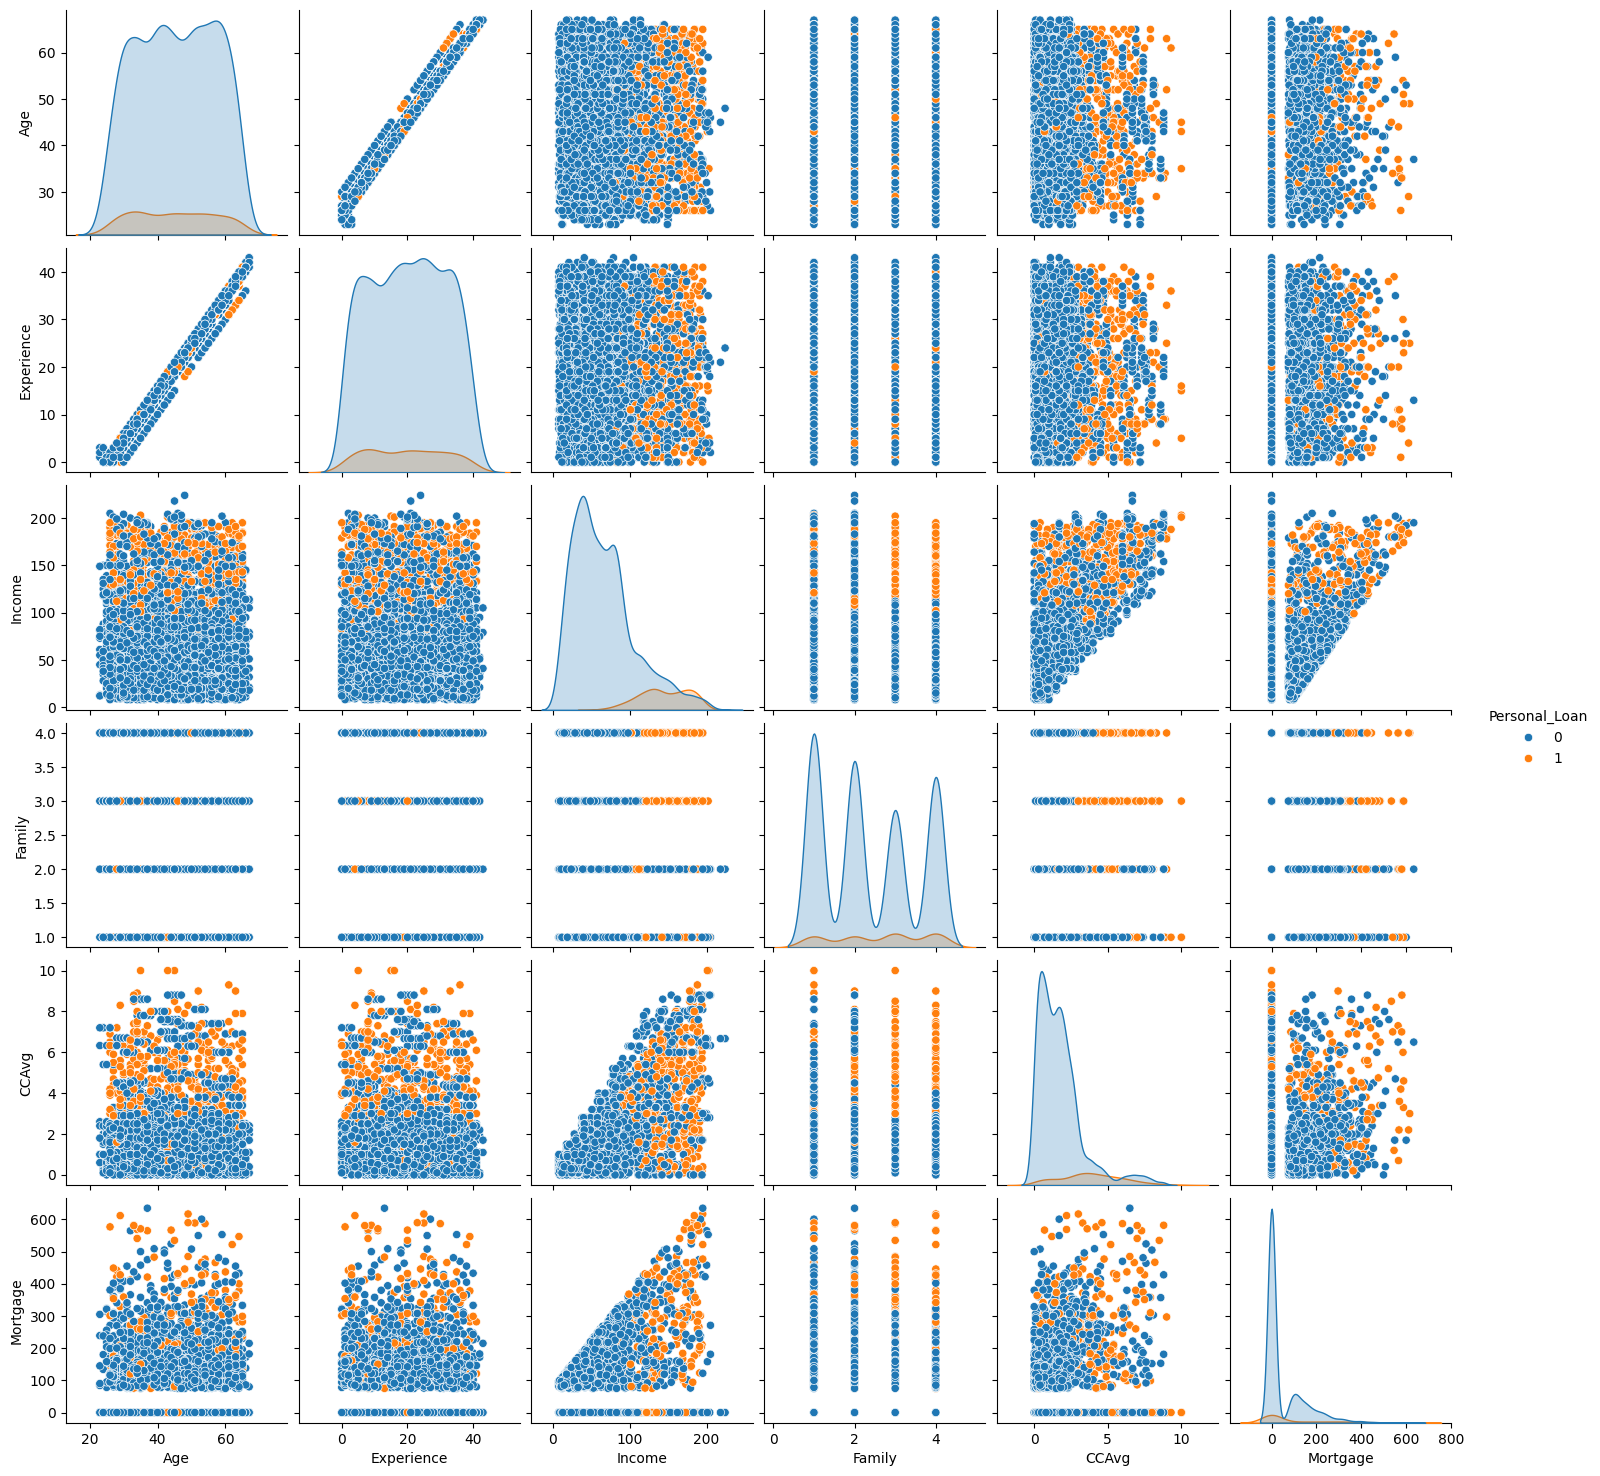

In [30]:
# Scatter plot matrix
#plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=num_features, hue='Personal_Loan', diag_kind='kde');

* Customers meeting the following criteria are more likely to purchase a personal loan:
  * **Income** greater than 100k
  * **Family** with more than two members
  * Average credit card spending (**CCAVG**) exceeding 2k

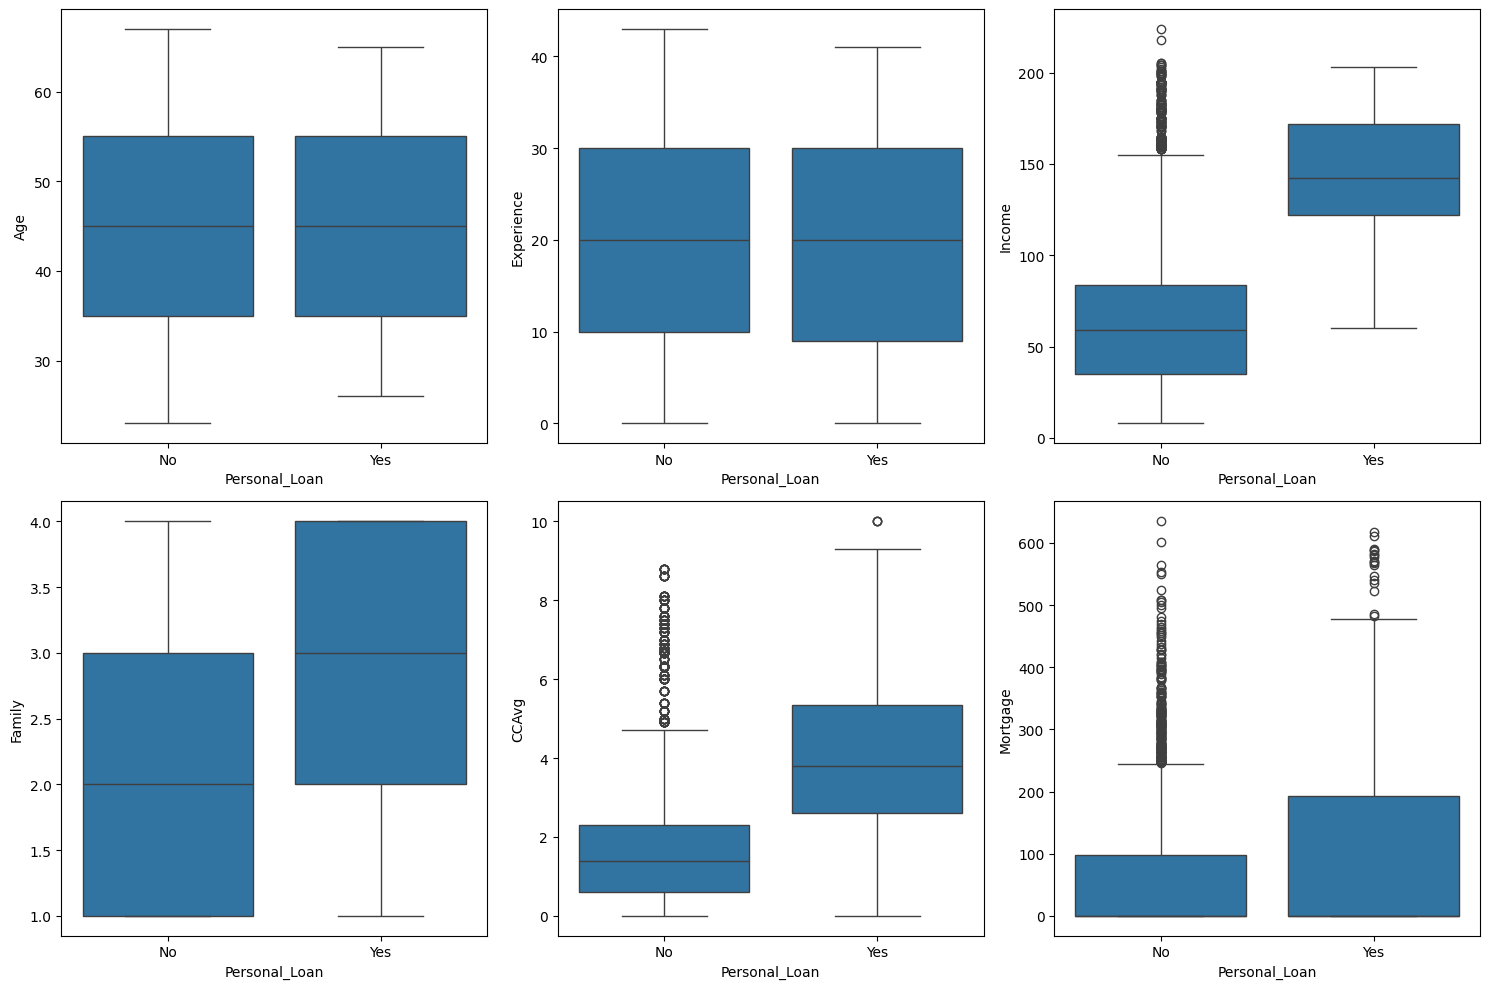

In [31]:
# defining the figure size
plt.figure(figsize=(15, 10))

num_rows = int(np.ceil(len(num_features) / 3))
num_cols = 3

# Box Plot for each numerical feature vs Personal Loan
for i, feature in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x='Personal_Loan', y=feature);  # box plot
    plt.xticks(xticks_boolean_value, xticks_boolean_label)
plt.tight_layout();   # to add spacing between plots

* Customer's interest to buy a personal loan is not impacted much by **Age** or **Experience**.
* There are outliers in the upperbound for **Income**, **CCAvg** and **Mortgage**.

#### Personal Loan vs Education

In [32]:
# function to create a crosstab for x_feature vs y_feature
def create_crosstab(x_feature, y_feature, rotation=None,xticks_value=None,xticks_label=None,figsize_x=7,figsize_y=5):
  tab = pd.crosstab(
      data[x_feature],
      data[y_feature],
      normalize='index'    # normalizing by dividing each row by its row total
  ).sort_values(by=0, ascending=False)    # sorting the resulting crosstab

  # Change legend 0 to no and 1 to yes
  tab.columns = xticks_boolean_label

  # Plot the stacked bar chart
  tab.plot(kind='bar', stacked=True, figsize=(figsize_x, figsize_y))    # creating a stacked bar chart from the normalized crosstab
  plt.xlabel(x_feature)
  plt.xticks(xticks_value,xticks_label,rotation=rotation, ha='center')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title=y_feature);    # adding a legend for the y_feature column

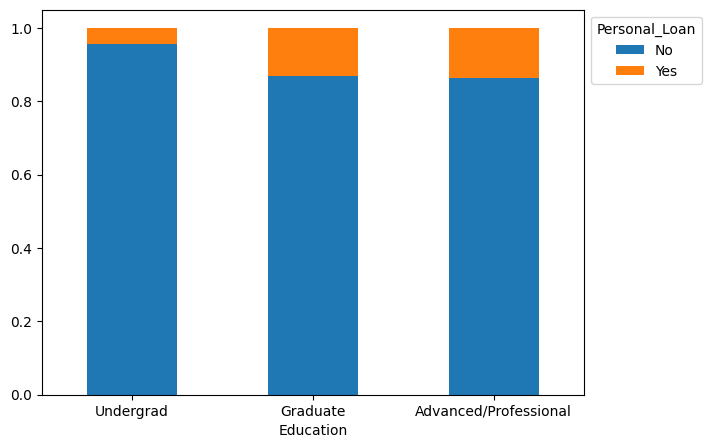

In [33]:

# create a crosstab for Personal_Loan vs Education
x_feature = 'Education'
y_feature = 'Personal_Loan'

rotation = 0

create_crosstab(x_feature,y_feature ,rotation,xticks_education_value,xticks_education_label);


* Customers who are Graduates or Advanced/Professionals have a better chance to buy a personal loan compared to Undergrads.

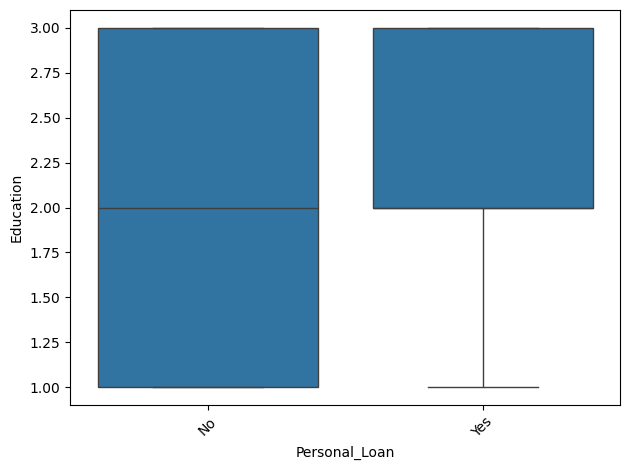

In [34]:
# Box plot
sns.boxplot(data=data, x='Personal_Loan', y='Education');  # box plot

plt.xticks(xticks_boolean_value, xticks_boolean_label)
plt.xticks(rotation=45, ha='center')
plt.tight_layout();   # to add spacing between plots

* 75% of the customers who purchased the personal loan are Graduates or Advanced/Professionals

#### Personal Loan vs ZIPCode

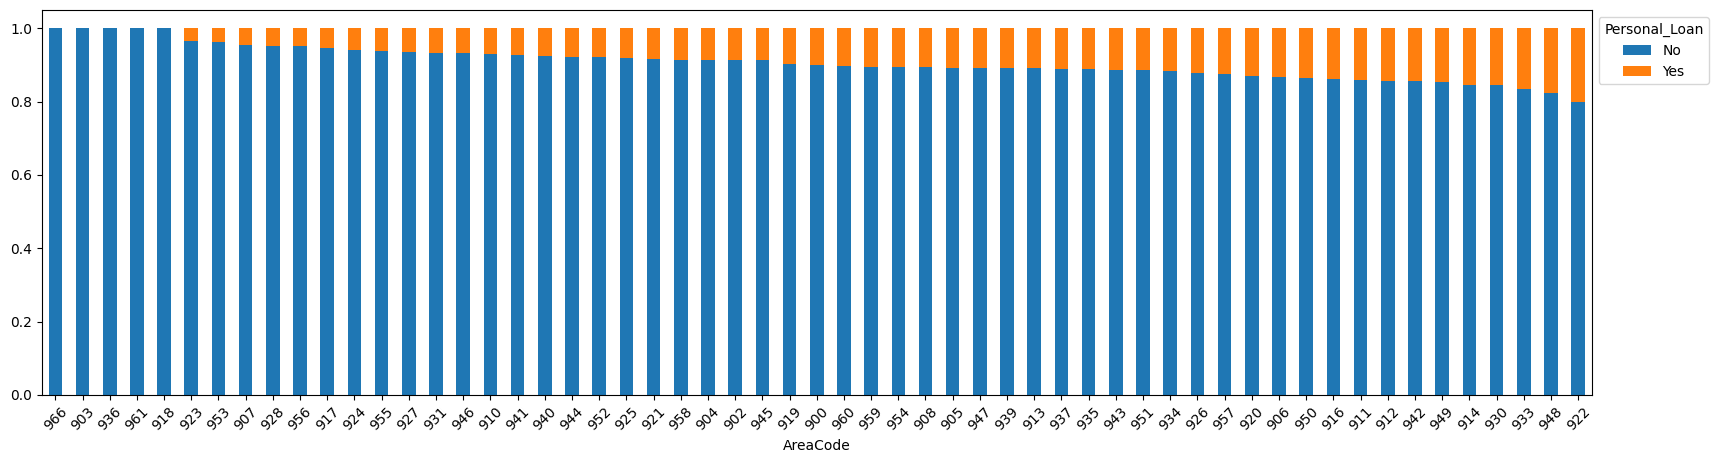

In [36]:
# create a crosstab for Personal_Loan vs AreaCode(First three digits of Zip Code)
x_feature = 'AreaCode'
y_feature = 'Personal_Loan'

rotation = 45


create_crosstab(x_feature,y_feature,rotation,None,None,20,5);

* Top 5 area codes where customers are most likely to buy a personal loan are 922, 948, 933, 930 and 914.
* Customers in area codes 966, 903, 936, 961 and 918 are less likely to buy a personal loan.

#### Personal Loan vs Securities_Account, CD_Account, Online, CreditCard

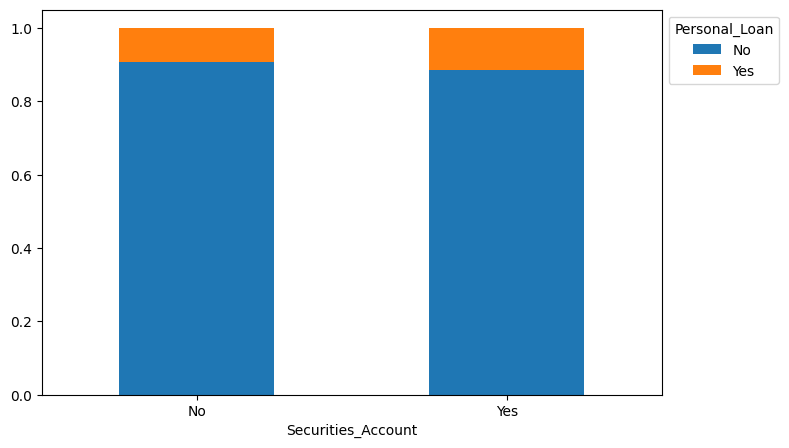

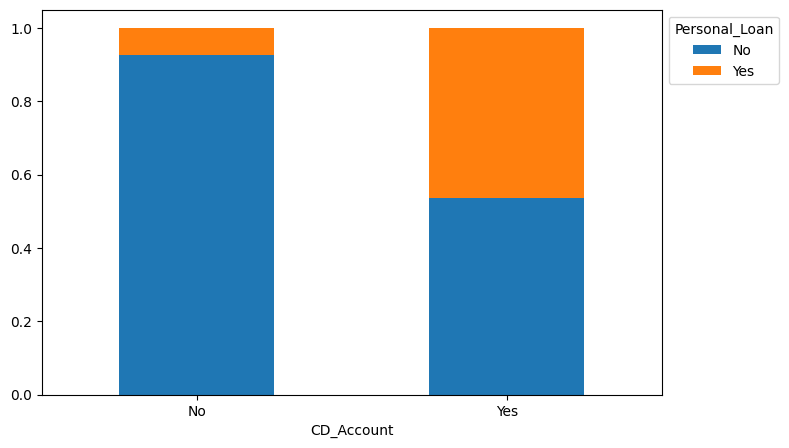

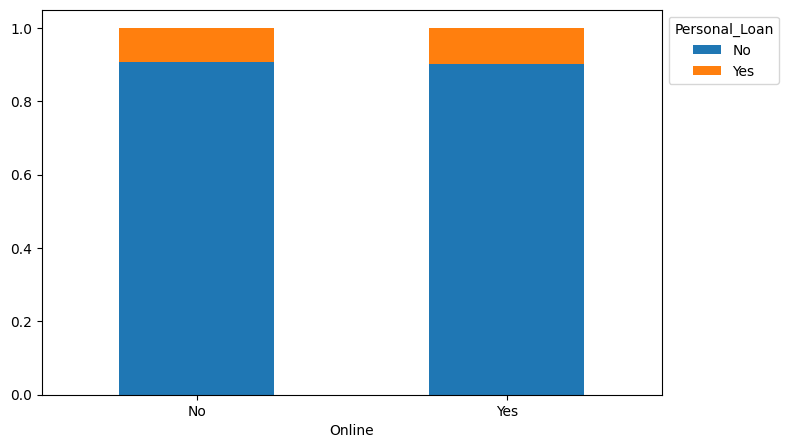

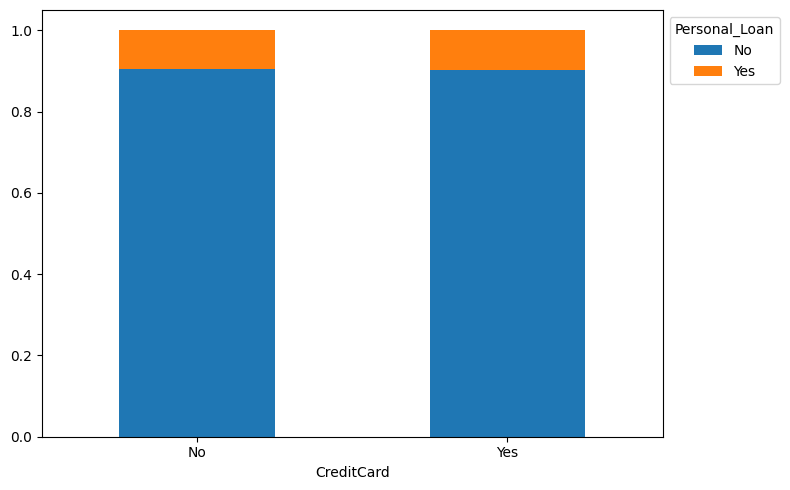

In [37]:
# Compare Personal Loan vs other boolean feature columns
customer_boolean_features.remove('Personal_Loan')

# plotting the histogram for each account feature
for i, feature in enumerate(customer_boolean_features):
    # creating a crosstab for Personal_Loan vs feature
    create_crosstab(feature,'Personal_Loan',None,xticks_boolean_value,xticks_boolean_label,8,5)

plt.tight_layout();   # to add spacing between plots

* Customers having a **CD_Account** are likely to buy a personal loan.
* Having a **Securities_Account**, using **Online** banking services, or using a **CreditCard** from other banks does not significantly influence to buy a personal loan.

### Questions

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
  * The distribution for mortage is right-skewed and there are outliers in the higher end.

---

2. How many customers have credit cards?
  * Assuming all the customers who have an average spending on credit cards per month greater than "0" are those who have a credit card either with All life Bank or any other bank, we have 4894 customers who have a credit card.
  * There are 3452 customers who use only All life Bank credit card.
  * There are 1470 customers who use a credit card issued by any other Bank (excluding All life Bank).



---


3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
  * The positive correlation between **Personal_Loan** and **Income** is stronger than other attributes.
  * The correlation between **Personal_Loan** and **CCAvg** & **Personal_Loan** and **CD_Account** are positive but not as strong as that between **Personal_Loan** and **Income**.
  * **Personal_Loan** and **Education** & **Personal_Loan** and **Mortgage** have a weak positive corelation.

---


4. How does a customer's interest in purchasing a loan vary with their age?
  * Customer's interest to buy a personal loan is not impacted much by **Age**.


---


5. How does a customer's interest in purchasing a loan vary with their education?
  * Customers who are Graduates or Advanced/Professionals have a better chance to buy a personal loan compared to Undergrads.
  

---



## Data Preparation for Modeling

In [38]:
# defining the explanatory (independent) and response (dependent) variables
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]

In [39]:
X.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  AreaCode  
0                   1           0       0           0       911  
1                   1           0       0           0       900  
2                   0           0       0           0       947  
3                   0           0       0           0       941  
4                   0           0       0           1       913

In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [41]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [42]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (4000, 12)
Shape of test set: (1000, 12) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

* The final model should effectively identify as many potential buyers as possible, minimizing missed opportunities.
* A high-recall model with consistent performance across training and testing datasets should be selected.

Define utility functions to collate all the metrics into a single data frame, and another to plot the confusion matrix.

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [44]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

### Decision Tree (sklearn default)

In [45]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Model Evaluation

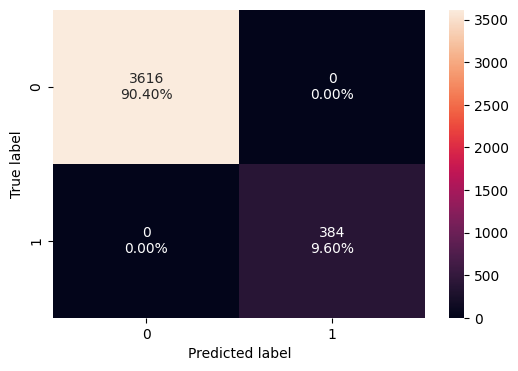

In [46]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [47]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

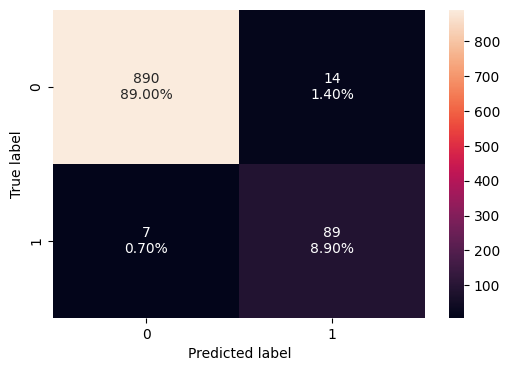

In [48]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [49]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

Accuracy    Recall  Precision        F1
0     0.979  0.927083   0.864078  0.894472

* The model correctly identifies 92.7% of the true positives (customers who would purchase a loan). This is strong, but there is a slight decrease from the training set's perfect recall of 100%.
* The model shows perfect performance on the training set and a good performance (but slightly lower) on the test set, the model is likely overfitting.

#### Visualizing the decision tree

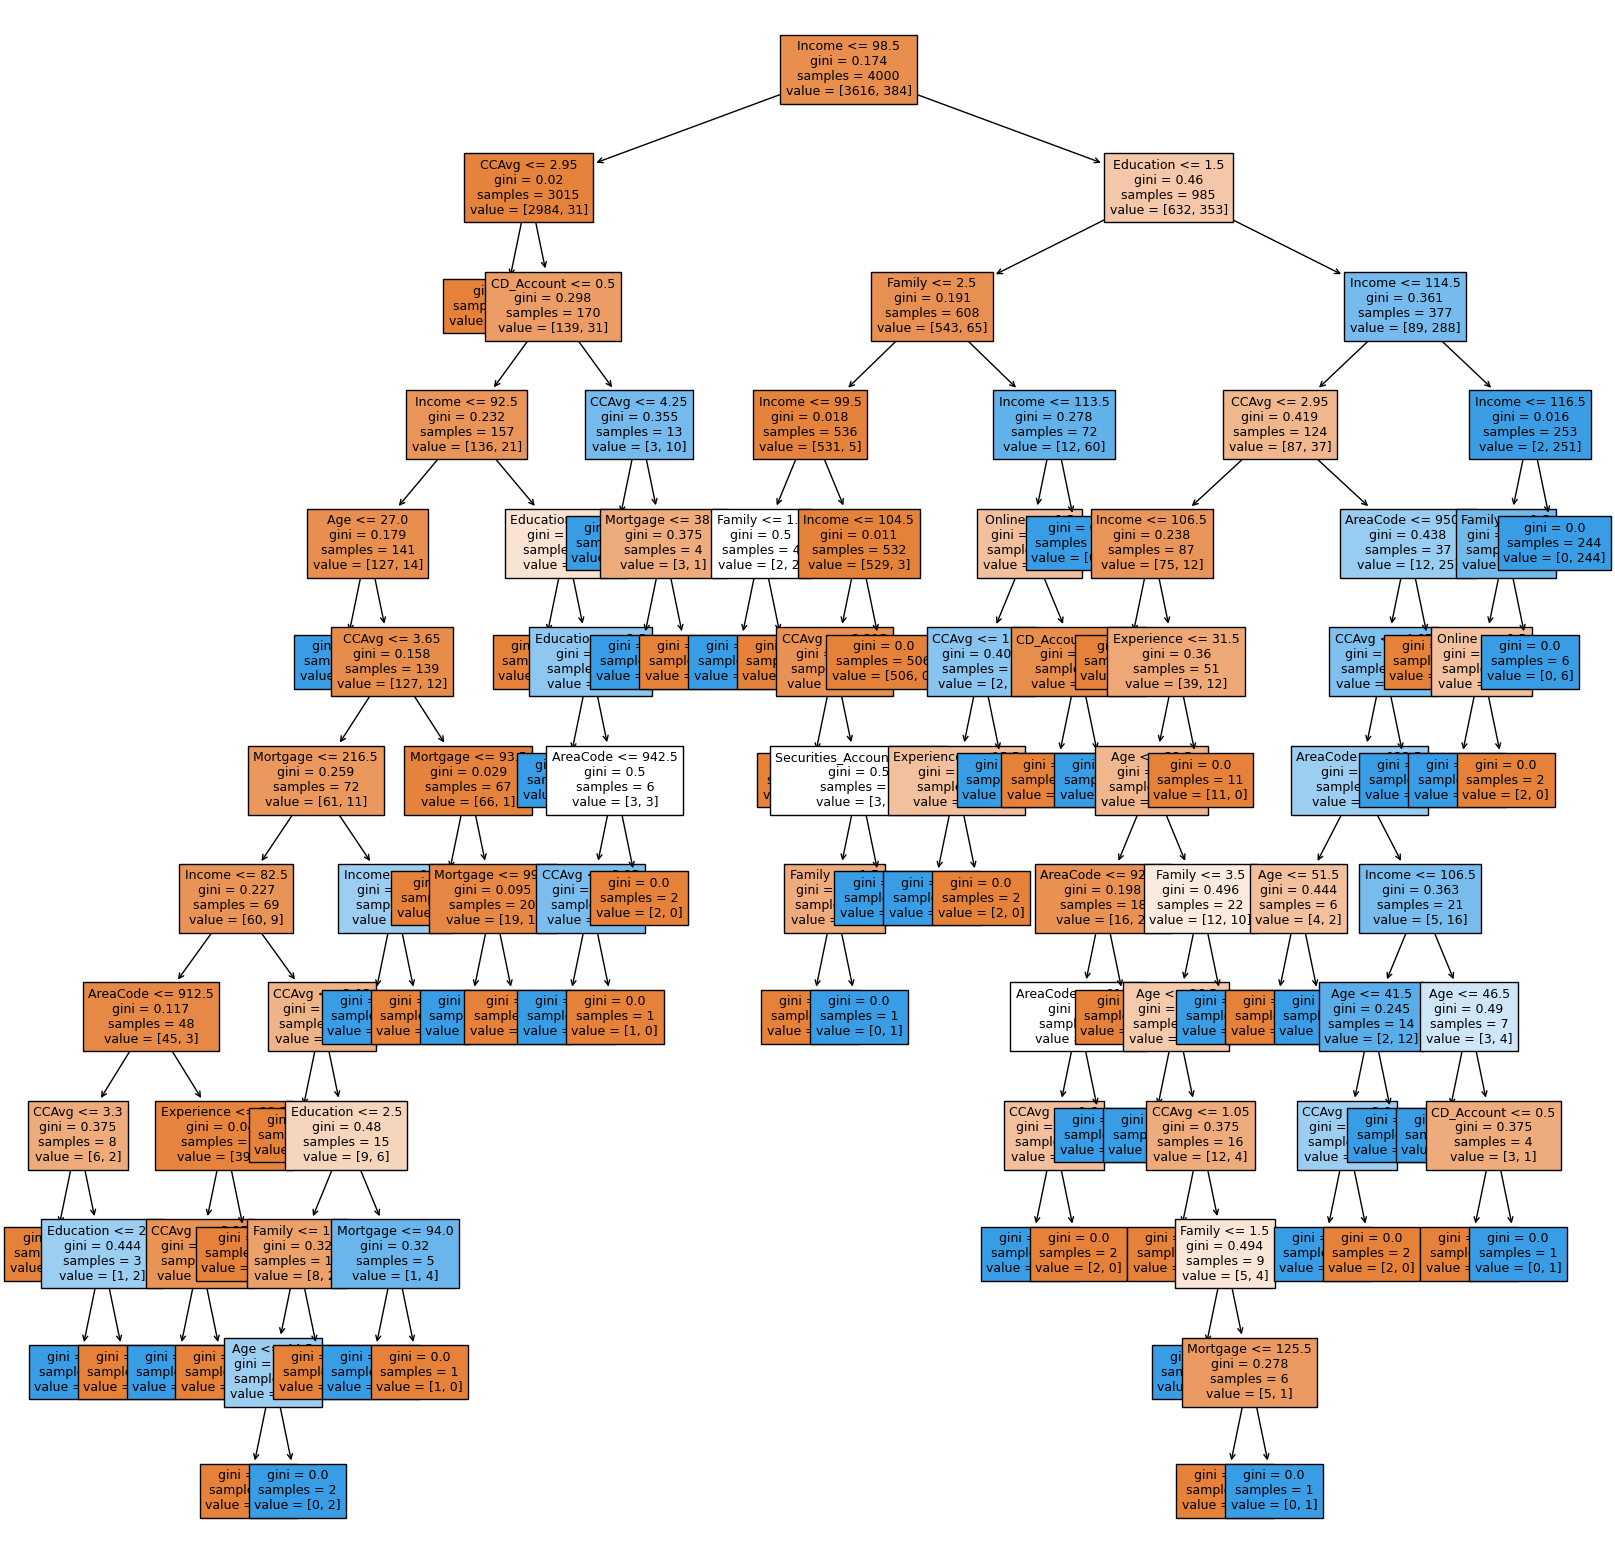

In [50]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [51]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- AreaCode <= 912.50
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.30
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- CCAvg >  3.30
|   |   |   |   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |

#### Feature Importance

In [52]:
# Print importance of features in the tree building
print(
    pd.DataFrame(
        dtree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.409991
Education           0.301776
Family              0.141421
CCAvg               0.067735
Age                 0.021835
CD_Account          0.018746
AreaCode            0.013096
Mortgage            0.012085
Online              0.006709
Experience          0.004445
Securities_Account  0.002161
CreditCard          0.000000


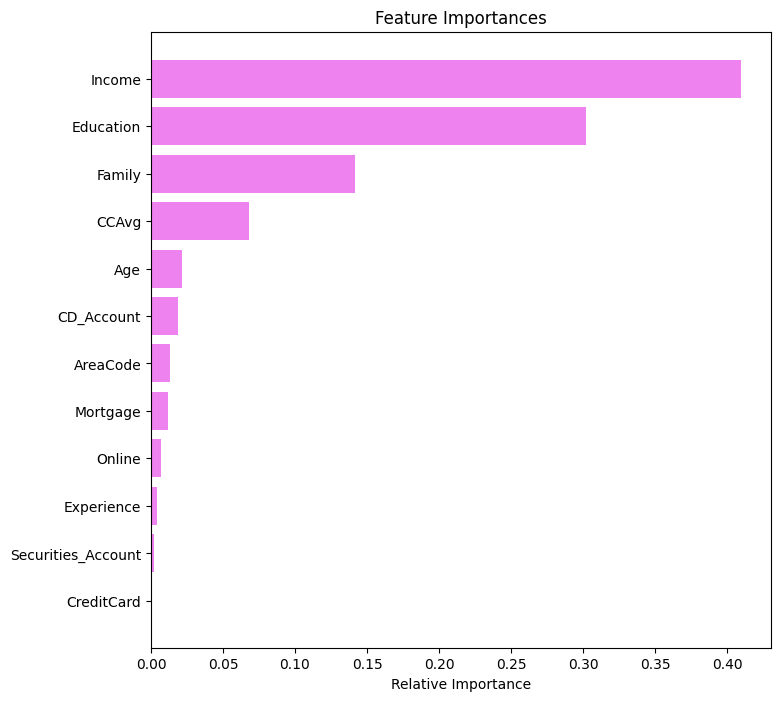

In [53]:
# importance of features in the tree building
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income and Education are the most influential attributes in determining, if acustomer will buy a personal loan.
* Family and average credit card spending per month are the next best attributes to consider.

## Model Performance Improvement

### Decision Tree (Pre-pruning)

In [55]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 15, 2)
max_leaf_nodes_values = np.arange(10, 71, 10)
min_samples_split_values = np.arange(5, 71, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [56]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, min_samples_split=15,
                       random_state=42)

#### Model Evaluation

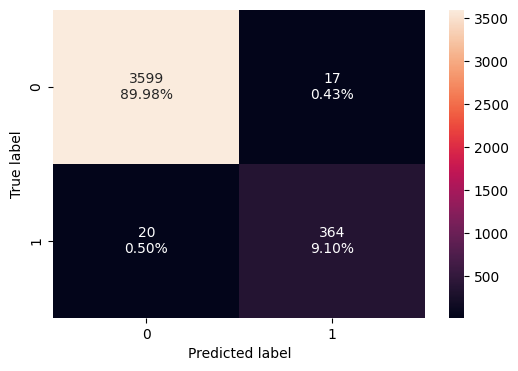

In [57]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [58]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

Accuracy    Recall  Precision        F1
0   0.99075  0.947917   0.955381  0.951634

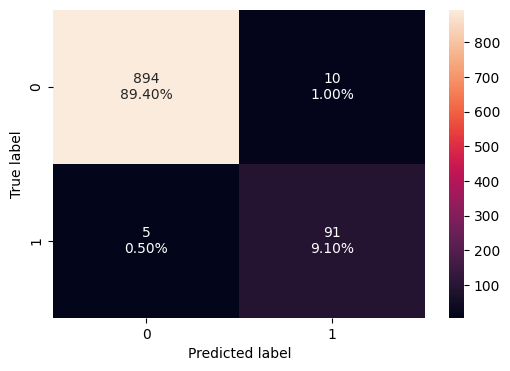

In [59]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [60]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

Accuracy    Recall  Precision        F1
0     0.985  0.947917    0.90099  0.923858

* The model performs consistently well across training and test sets, with only a small drop in precision and F1-score. This indicates a generalized performance with minimal overfitting.
* Recall remains unchanged between training and test sets, demonstrating that the model is highly reliable at capturing potential buyers (minimizing false negatives).

#### Visualizing the decision tree

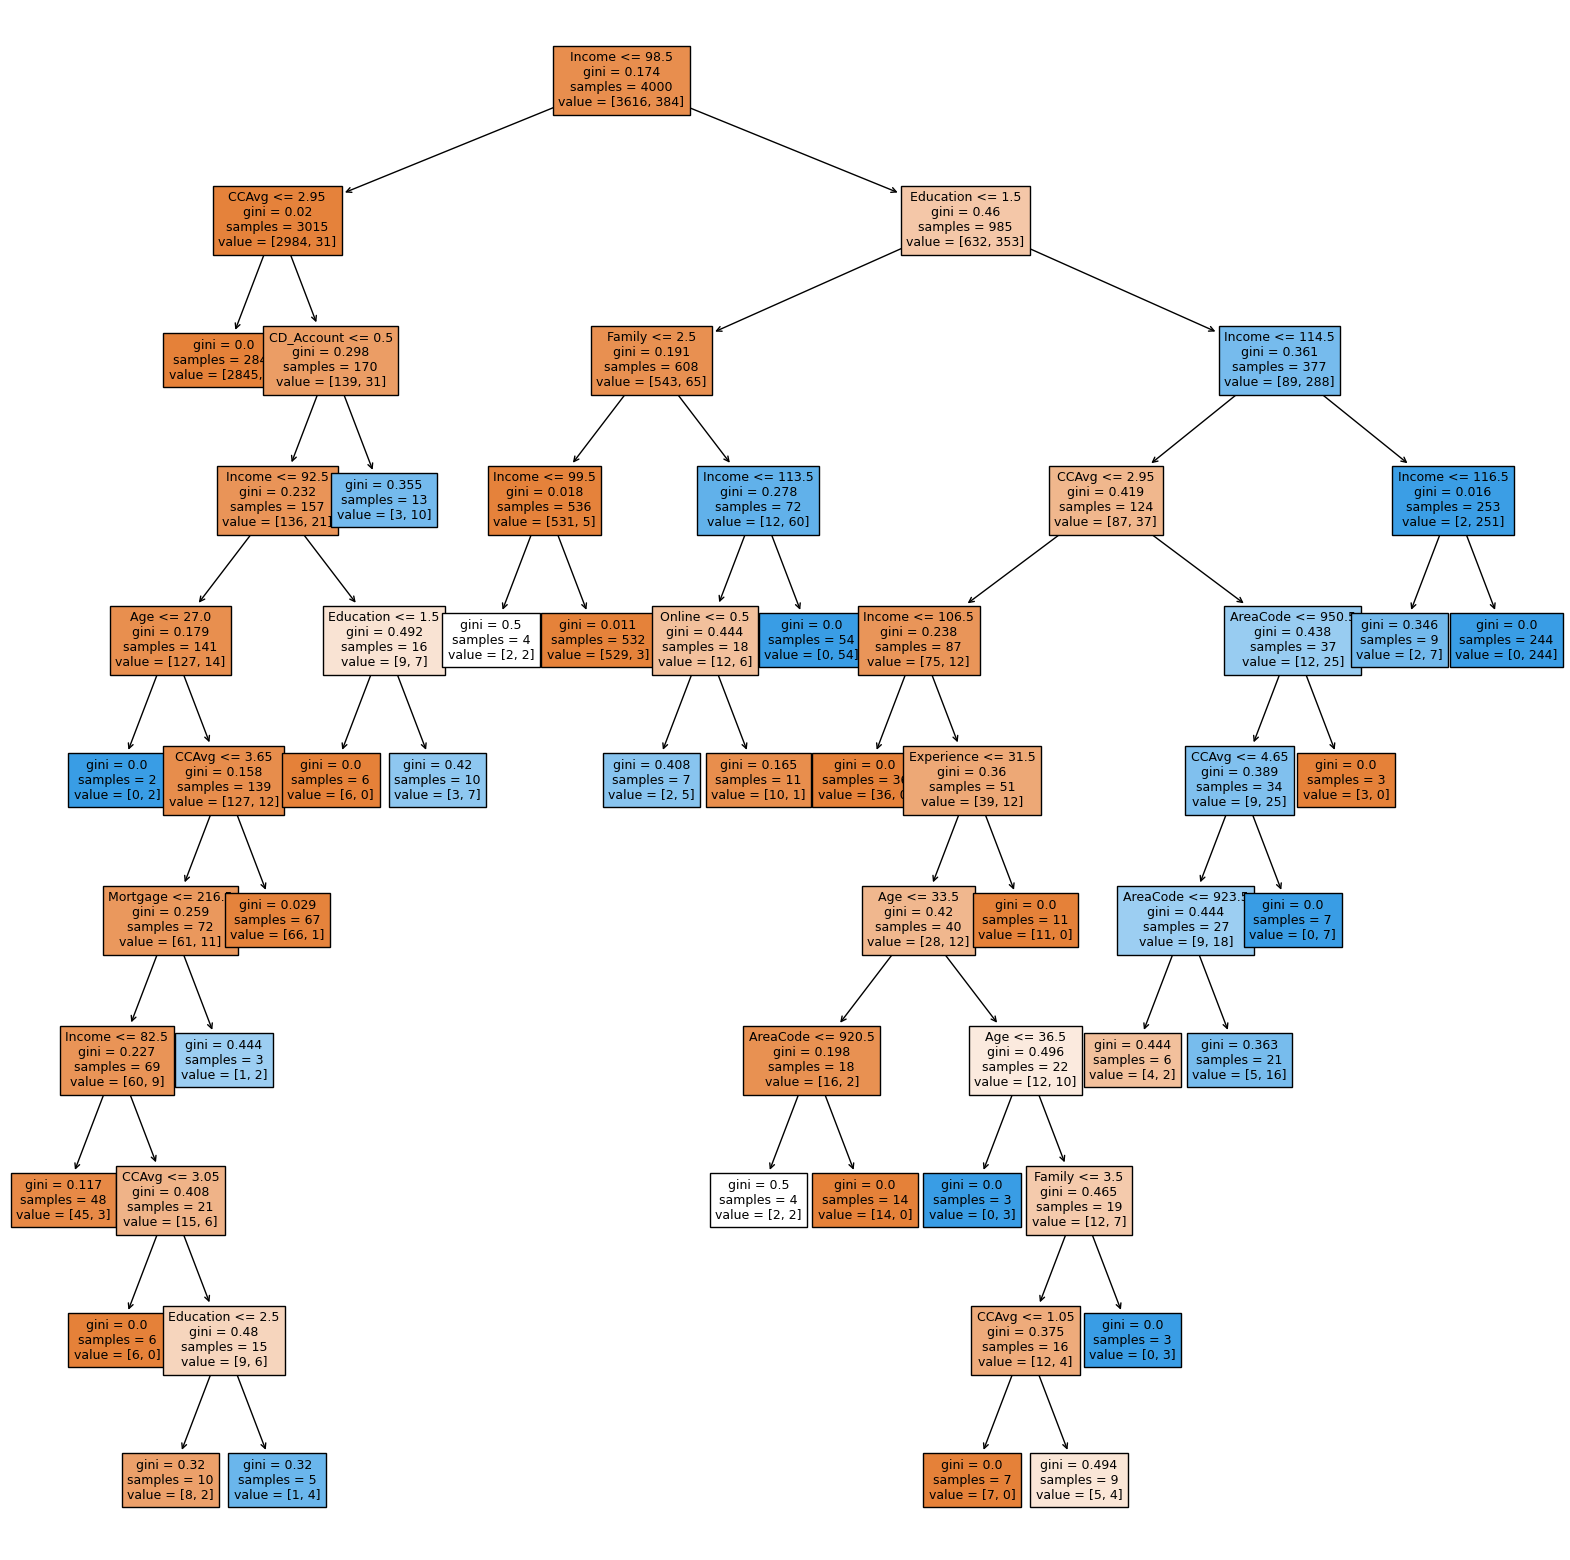

In [61]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [62]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- weights: [45.00, 3.00] class: 0
|   |   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [8.00, 2.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 4.00] class: 1

#### Feature Importance

In [63]:
# Print importance of features in the tree building
print(
    pd.DataFrame(
        dtree2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.440975
Education           0.323790
Family              0.139285
CCAvg               0.048750
CD_Account          0.015169
Age                 0.012036
AreaCode            0.009778
Online              0.005201
Mortgage            0.002586
Experience          0.002429
Securities_Account  0.000000
CreditCard          0.000000


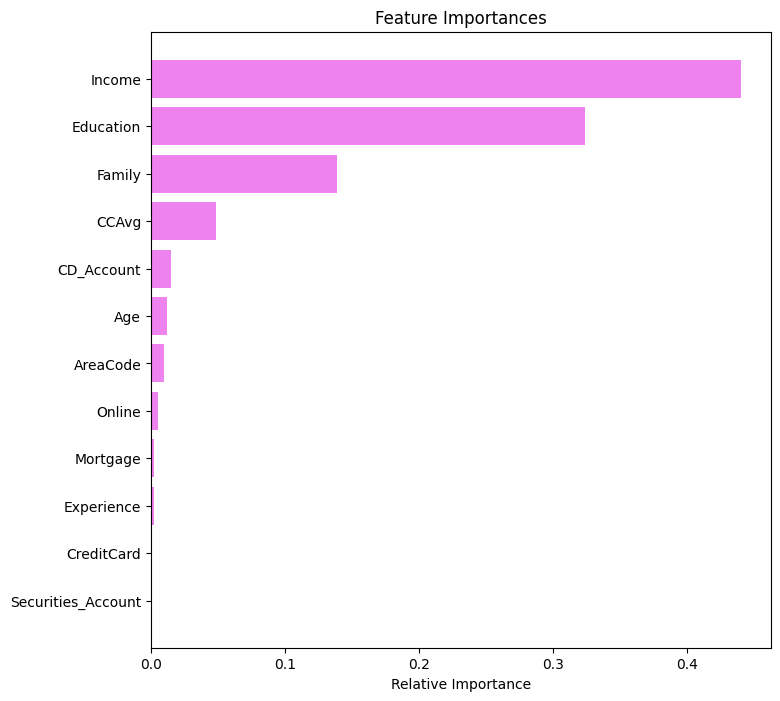

In [64]:
# importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income and Education are the most influential attributes in determining, if acustomer will buy a personal loan.
* Family and average credit card spending per month are the next best attributes to consider.

### Decision Tree (Post-pruning)

In [65]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [66]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000244    0.000487
2     0.000246    0.000980
3     0.000250    0.001480
4     0.000306    0.002399
5     0.000331    0.003391
6     0.000333    0.003724
7     0.000333    0.004058
8     0.000333    0.004391
9     0.000350    0.005441
10    0.000373    0.006932
11    0.000375    0.007307
12    0.000375    0.007682
13    0.000381    0.008063
14    0.000382    0.009593
15    0.000389    0.009982
16    0.000400    0.010382
17    0.000417    0.010799
18    0.000419    0.013315
19    0.000455    0.013770
20    0.000468    0.015174
21    0.000493    0.016159
22    0.000542    0.017242
23    0.000550    0.019442
24    0.000584    0.020026
25    0.000745    0.020771
26    0.000779    0.021550
27    0.000823    0.022373
28    0.000831    0.023204
29    0.000870    0.024945
30    0.002424    0.027369
31    0.002667    0.030036
32    0.003000    0.033036
33    0.003753    0.036789
34    0.020023    0.056812
35    0.021549    0.078361
36    0.047604    0.173568

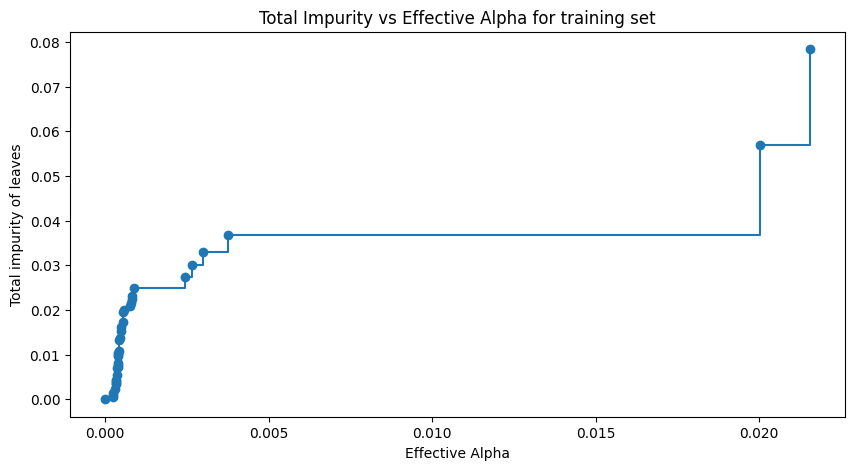

In [67]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

* Next, we train a decision tree using the effective alphas.

* The last value in `ccp_alphas` is the alpha value that prunes the whole tree,
leaving the corresponding tree with one node.

In [68]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04760359071815694


* Moving ahead, we remove the last element in
``clfs`` and ``ccp_alphas`` as it corresponds to a trivial tree with only one
node.

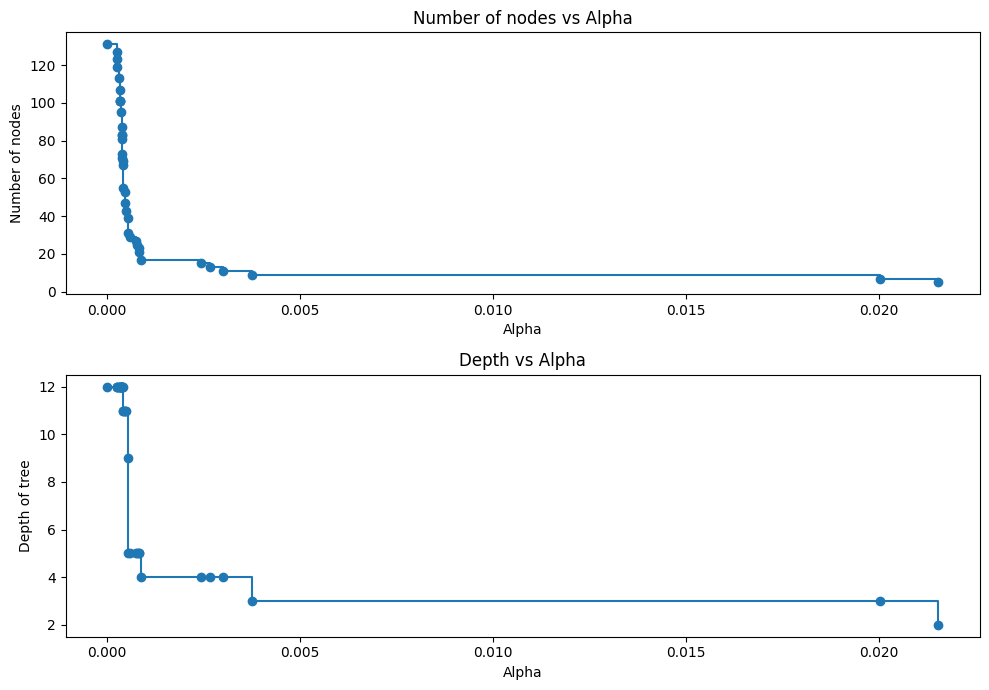

In [69]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [70]:
train_recall_scores = []  # Initialize an empty list to store recall scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the recall score for the training set predictions compared to true labels
    recall_train = recall_score(y_train, pred_train)

    # Append the calculated recall score to the train_recall_scores list
    train_recall_scores.append(recall_train)

In [71]:
test_recall_scores = []  # Initialize an empty list to store recall scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the recall score for the test set predictions compared to true labels
    recall_test = recall_score(y_test, pred_test)

    # Append the calculated F1 score to the test_recall_scores list
    test_recall_scores.append(recall_test)

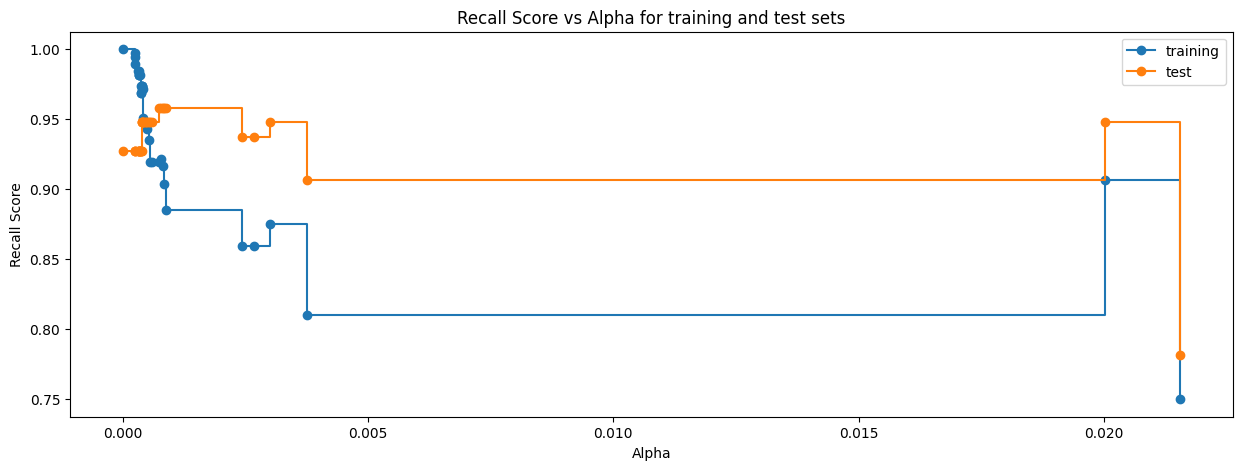

In [72]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("Recall Score")  # Set the label for the y-axis
ax.set_title("Recall Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training recall scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_recall_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_recall_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [73]:
# creating the model where we get highest test recall Score
index_best_model = np.argmax(test_recall_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.0007452305246422896, random_state=42)


#### Model Evaluation

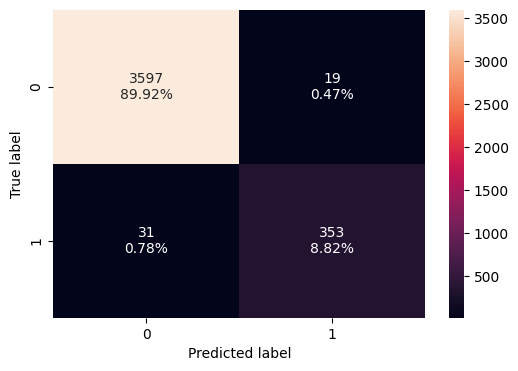

In [74]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [75]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

Accuracy    Recall  Precision        F1
0    0.9875  0.919271   0.948925  0.933862

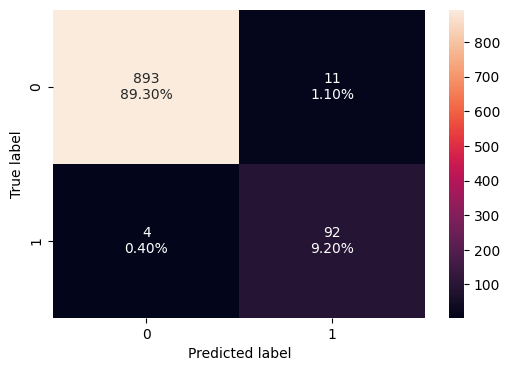

In [76]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [77]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

Accuracy    Recall  Precision        F1
0     0.985  0.958333   0.893204  0.924623

* The performance on the training and test sets is consistent, with only minor differences across all metrics.
* The slight drop in precision and F1-Score on the test set suggests minimal overfitting.
* The recall on the test set is higher than on the training set (95.83% vs. 91.93%), the model seems to be better at capturing actual buyers in unseen data. This is a positive outcome for the business goal of minimizing false negatives.

#### Visualizing the decision tree

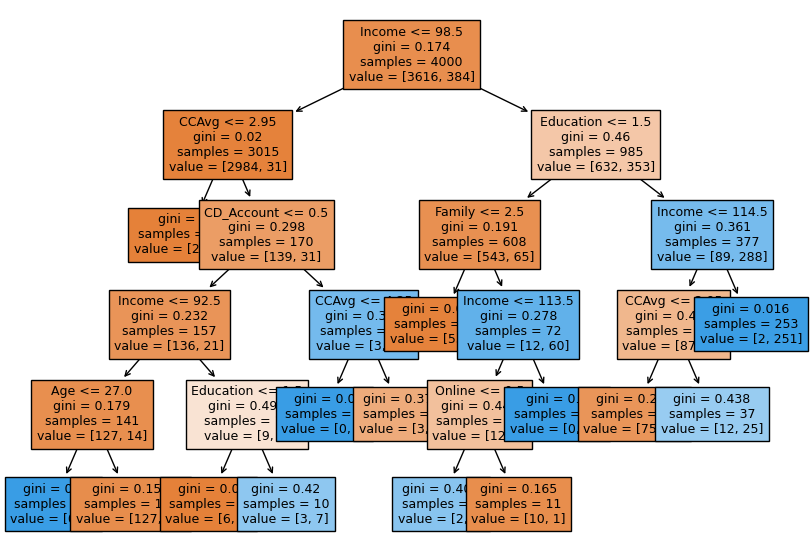

In [78]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [79]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- weights: [127.00, 12.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [3.00, 7.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.25
|   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |--- CCAvg >  4.25
|   |   |   |   |--- weights: [3.00, 1.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- Online <

#### Feature Importance

In [80]:
# Print importance of features in the tree building
print(
    pd.DataFrame(
        dtree3.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.450436
Education           0.334727
Family              0.141029
CCAvg               0.047117
CD_Account          0.015865
Online              0.005440
Age                 0.005386
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
CreditCard          0.000000
AreaCode            0.000000


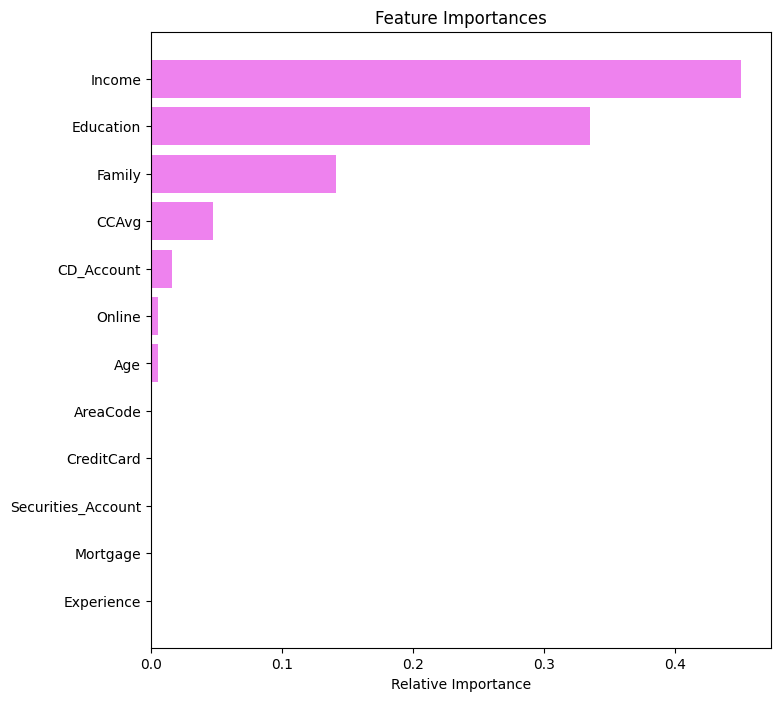

In [81]:
# importance of features in the tree building
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income and Education are the most influential attributes in determining, if acustomer will buy a personal loan.
* Family and average credit card spending per month are the next best attributes to consider.

## Model Performance Comparison and Final Model Selection

In [82]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.990750   
Recall                                 1.0                     0.947917   
Precision                              1.0                     0.955381   
F1                                     1.0                     0.951634   

           Decision Tree (Post-Pruning)  
Accuracy                       0.987500  
Recall                         0.919271  
Precision                      0.948925  
F1                             0.933862

In [83]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.979000                     0.985000   
Recall                            0.927083                     0.947917   
Precision                         0.864078                     0.900990   
F1                                0.894472                     0.923858   

           Decision Tree (Post-Pruning)  
Accuracy                       0.985000  
Recall                         0.958333  
Precision                      0.893204  
F1                             0.924623

* Default Decision Tree:
    * Lowest recall (92.71%) and F1-Score (89.45%) among the three models.
    * Not recommended due to subpar performance on key metrics.
* Pre-Pruning Model:
    * Strong performance on precision (90.10%), reducing false positives and ensuring cost-efficient campaigns.
    * Balanced recall (94.79%) and F1-Score (92.39%).
    * A good option if avoiding false positives is prioritized.
* Post-Pruning Model:
    * Highest recall (95.83%), minimizing missed potential buyers.
    * Slightly lower precision (89.32%) compared to the Pre-Pruning model.
    * Best F1-Score (92.46%), ensuring a strong balance between recall and precision.
    * Aligns closely with the campaign’s primary goal of maximizing recall.


We'll move ahead with the post-pruned decision tree as our final model.

#### Predicting on a single data point

In [84]:
%%time
# choosing a data point
customer_details = X_test.iloc[1:2, :]

# making a prediction
personalloan_buy_prediction = dtree3.predict(customer_details)

print(personalloan_buy_prediction)

[1]
CPU times: user 3.07 ms, sys: 1 µs, total: 3.07 ms
Wall time: 2.97 ms


* The model was able to predict in under half a second.
* Instead of predicting a class (buy/reject), the model can also predict the likelihood of purchase.

In [85]:
# making a prediction
personalloan_buy_likelihood = dtree3.predict_proba(customer_details)

print(personalloan_buy_likelihood[0, 1])

0.9920948616600791


* This indicates that the model is ~99% confident that the customer will buy the personal loan.

## Actionable Insights and Business Recommendations


**Actionable Insights:**
* Customer Segments likely to buy Personal Loans:
    * Customers with income exceeding $100K.
    * Customers with graduate or advanced/professional degrees.
    * Families with more than 2 members.
    * Customers with average monthly credit card spending exceeding $2,000.
* Key Drivers influencing Loan Purchase:
    * Income: High-income customers are more likely to consider personal loans.
    * Education: Those with graduate or advanced/professional degrees typically earn higher incomes and are more likely to consider personal loans.
    * Family Size: Larger families may require additional financial support, driving loan purchases.
    * Spending Behavior: Customers with higher credit card spending are more inclined toward personal loans.
* Model Performance Highlights:
    * The Post-Pruning Decision Tree model effectively captures potential buyers with a recall of 95.83% on the test dataset.
    * The model maintains a strong balance between recall and precision, with an F1-score of 92.46%, ensuring high confidence in predictions.

**Business Recommendations:**
* Targeted Marketing Campaigns - Focus on customers meeting the identified criteria (income > $100k, education - graduate or advanced/professional, family > 2 members, CCAVG > 2k).
* Geographic Focus - Prioritize affluent neighborhoods and regions where high-income customers are concentrated.
* Target areas with higher property values and credit card spending patterns.
* The bank can run pilot campaigns based on model predictions to validate effectiveness.


___